**PRIMREA ENTREGA**

**OBJETIVO**

**Exámenes de matematicas, lectura y escritura de estudiantes.**

El objetivo como científico de datos es investigar la posible relación entre la actividad física, el estado civil de los padres y el género de los estudiantes, con los resultados de 
escritura, lectura y matemáticas en los exámenes. Este estudio tiene como propósito examinar cómo estos factores pueden influir en el rendimiento académico de los estudiantes en las 
áreas mencionadas.

Para lograr este objetivo, se llevará a cabo un análisis de datos que incluirá la recopilación de información sobre la actividad física de los estudiantes, el estado civil de sus 
padres y su género. 

Se recopilarán datos tanto objetivos como subjetivos sobre la actividad física de los estudiantes, utilizando dispositivos de seguimiento, encuestas y registros autoinformados. Además, 
se recopilará información sobre el estado civil de los padres, clasificando si son casados, solteros, divorciados o viudos. Asimismo, se registrará el género de los estudiantes, 
identificando si son hombres o mujeres.

Posteriormente, se analizarán los resultados de escritura, lectura y matemáticas en los exámenes de los estudiantes. Se utilizarán técnicas de análisis estadístico, para identificar 
posibles relaciones entre la actividad física, el estado civil de los padres, el género de los estudiantes, las horas de estudio, cantidad de hermanos y el rendimiento académico 
(variables de confusión). Al controlar estas variables en el diseño y análisis del estudio, se busca aislar el efecto específico de la actividad física en el resultado de interés y 
determinar si existe una relación directa entre ellos. Esto se logra mediante técnicas estadísticas adecuadas.

Los resultados de este estudio podrían proporcionar información importante sobre cómo la actividad física en los estudiantes están relacionados con el rendimiento académico. Estos 
hallazgos podrían ser utilizados para desarrollar estrategias educativas más efectivas que tomen en cuenta este factor, y promover intervenciones dirigidas a mejorar los resultados 
académicos en matemática ,escritura, lectura y rendimiento en los exámenes.

**En el primer caso vamos a analizar las puntuaciones de los estudiantes en matematicas**

1)¿como incide la actividad fisica en la puntuación de los estudiantes? ==> PREGUNTA DE INVESTIGACION
2)¿como incide el genero en la puntuación de los estudiantes? ==> PREGUNTA anexo de investigacion y confusión
3)¿como incide el estado civil de los padres en la puntuación de los estudiantes? ==> PREGUNTA anexo de investigacion y confusión
4)¿como incide la cantidad de hermanos en la puntuación de los estudiantes? ==> PREGUNTA anexo de investigacion y confusión
5)¿como incide la cantidad de horas de estudio en la puntuación de los estudiantes? ==> PREGUNTA anexo de investigacion y confusión

**Hipotesis**

La actividad fisica mejora el rendimiento academico de los estudiantes en matematicas,lectura y escritura

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder 

**OBTENCION DE LOS DATOS**

Fuente: https://www.kaggle.com/datasets/desalegngeb/students-exam-scores


In [3]:
df=pd.read_csv('Exams/Expanded_data_with_more_features.csv', sep=',', decimal='.', index_col=0)
df.head(5) # muestreo de los primeros 5 registros para ver la estructura de los datos, para ver si se importaron correctamente

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


PRIMEROS ANALISIS

In [4]:
df.describe() # se obtiene un resumen estadístico de los datos

,NrSiblings,MathScore,ReadingScore,WritingScore
count,29069.000000,30641.000000,30641.000000,30641.000000
mean,2.145894,66.558402,69.377533,68.418622
std,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,10.000000,4.000000
25%,1.000000,56.000000,59.000000,58.000000
50%,2.000000,67.000000,70.000000,69.000000
75%,3.000000,78.000000,80.000000,79.000000
max,7.000000,100.000000,100.000000,100.000000


Se obtiene los primeros datos estadisticos como la media , el desvio estandar , el minimo y el maximo de las variables de interes.

In [8]:
df["Score"]=((df['MathScore']+df['ReadingScore']+df['WritingScore'])/3).round(0) # se crea una nueva columna con la suma de las 3 calificaciones
df.head(5) # se muestra el dataset con la nueva columna

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,Score
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74,72.0
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88,82.0
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91,90.0
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42,48.0
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75,76.0


Creo una nueva columna donde se suman las puntuaciones de los tres examenes y se divide entre 3 para obtener un promedio de las puntuaciones de los tres examenes.

In [5]:
df1=df.query("PracticeSport == 'never'") ## se filtra el dataset para que solo contenga los que nunca practican deporte
df1.describe()

,NrSiblings,MathScore,ReadingScore,WritingScore
count,3808.000000,4004.000000,4004.000000,4004.000000
mean,2.184349,64.171079,68.337662,66.522727
std,1.469110,14.870058,14.641246,15.328275
min,0.000000,10.000000,11.000000,4.000000
25%,1.000000,54.000000,59.000000,56.000000
50%,2.000000,64.000000,68.000000,67.000000
75%,3.000000,75.000000,79.000000,78.000000
max,7.000000,100.000000,99.000000,100.000000


Datos estadisticos de los alumnos que nunca hicieron actividad fisica: tienen un promedio de 66.3 en Score (promedios de los 3 exámenes)

In [6]:
df2=df.query("PracticeSport != 'never'") ## se filtra el dataset para que solo contenga los que practican deporte (a veces o siempre)
df2.describe()

,NrSiblings,MathScore,ReadingScore,WritingScore
count,25261.000000,26637.000000,26637.000000,26637.000000
mean,2.140097,66.917258,69.533844,68.703608
std,1.456538,15.402464,14.770508,15.440947
min,0.000000,0.000000,10.000000,10.000000
25%,1.000000,56.000000,59.000000,58.000000
50%,2.000000,67.000000,70.000000,69.000000
75%,3.000000,78.000000,80.000000,80.000000
max,7.000000,100.000000,100.000000,100.000000


Datos estadisticos de los alumnos que hacen actividad fisica : tienen un promedio de 68.3 en Score

En las primeras conclusiones generales , podemos ver que los alumnos que ha
que los alumnos que no hacen actividad fisica.

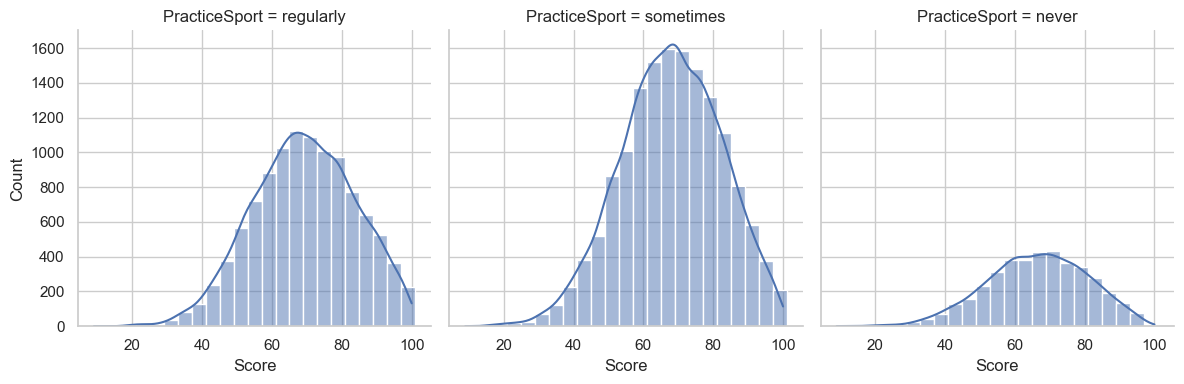

In [9]:
sns.set_theme(style="whitegrid")
sns.displot(data=df, x="Score",col="PracticeSport",binwidth=4,height=4,facet_kws=dict(margin_titles=True), kde=True, bins=20)

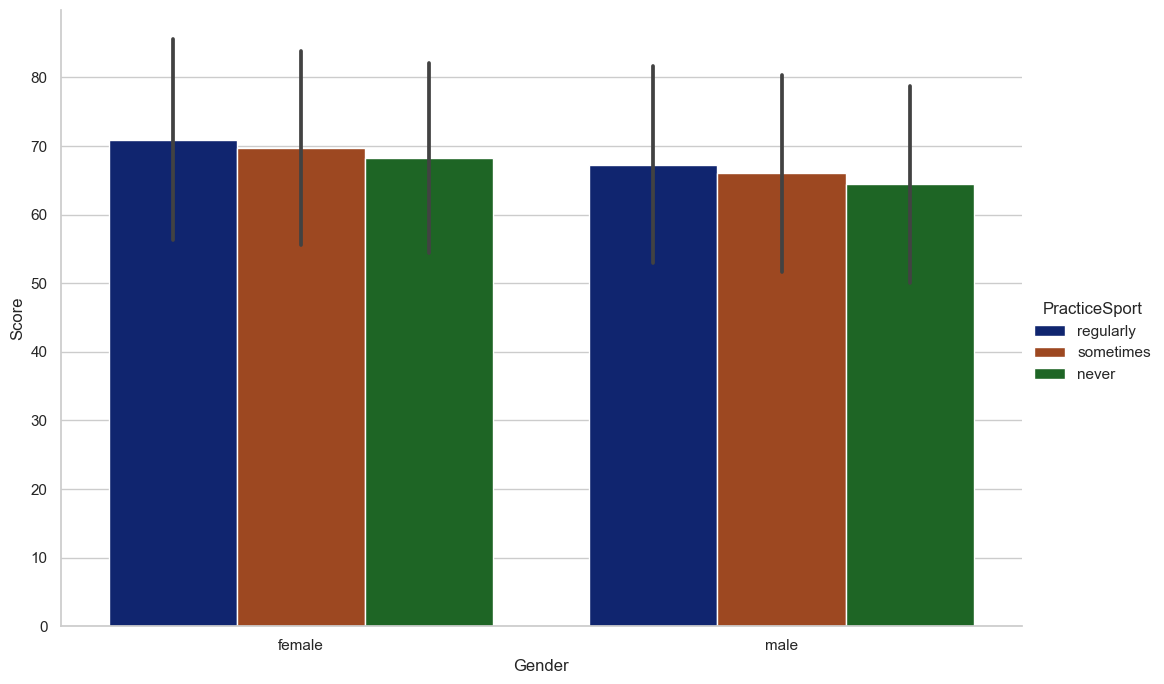

In [10]:
sns.set_theme(style="whitegrid")

sns.catplot(data=df,kind="bar",x="Gender",y="Score",hue="PracticeSport",errorbar="sd",palette="dark",height=7,aspect=1.5)

Se puede apreciar en este grafico de barras se puede ver que la mayoria de los alumnos que hacen actividad fisica tienen un mejor rendimiento academico que los alumnos que no hacen 
actividad fisica en ambos sexos.

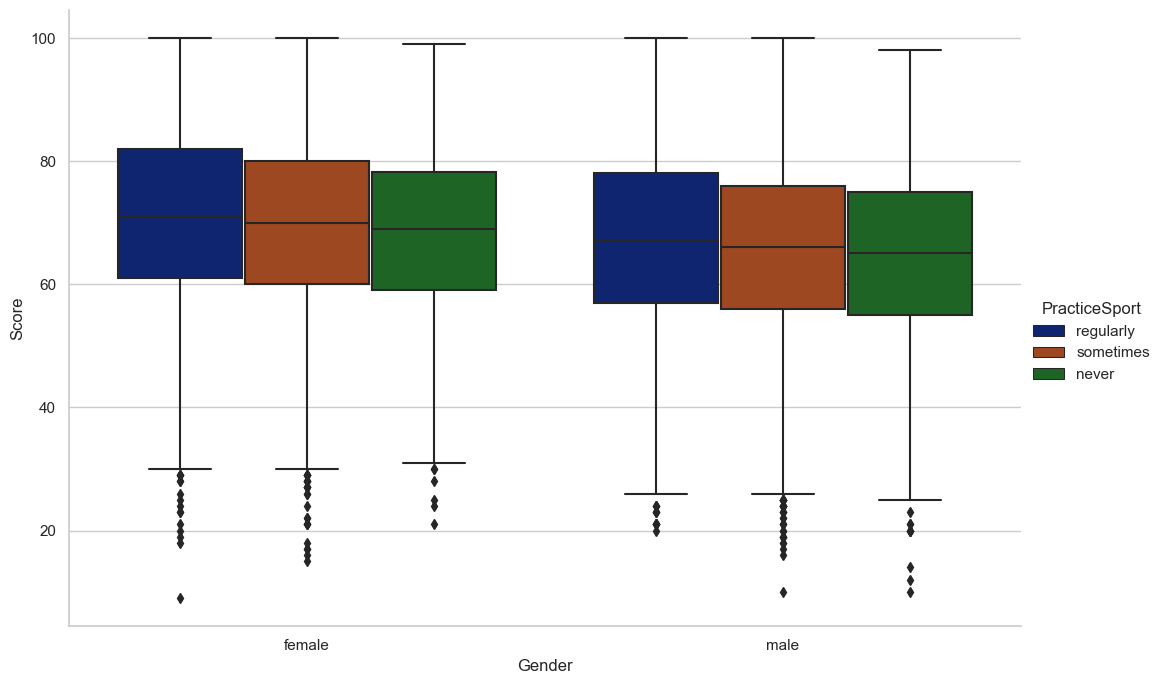

In [11]:
sns.set_theme(style="whitegrid")

sns.catplot(data=df,kind="box",x="Gender",y="Score",hue="PracticeSport",errorbar="sd",palette="dark",height=7,aspect=1.5)

Se observa que los alumnos que hacen actividad fisica tienen un mejor rendimiento academico que los alumnos que no hacen actividad fisica en ambos sexos.

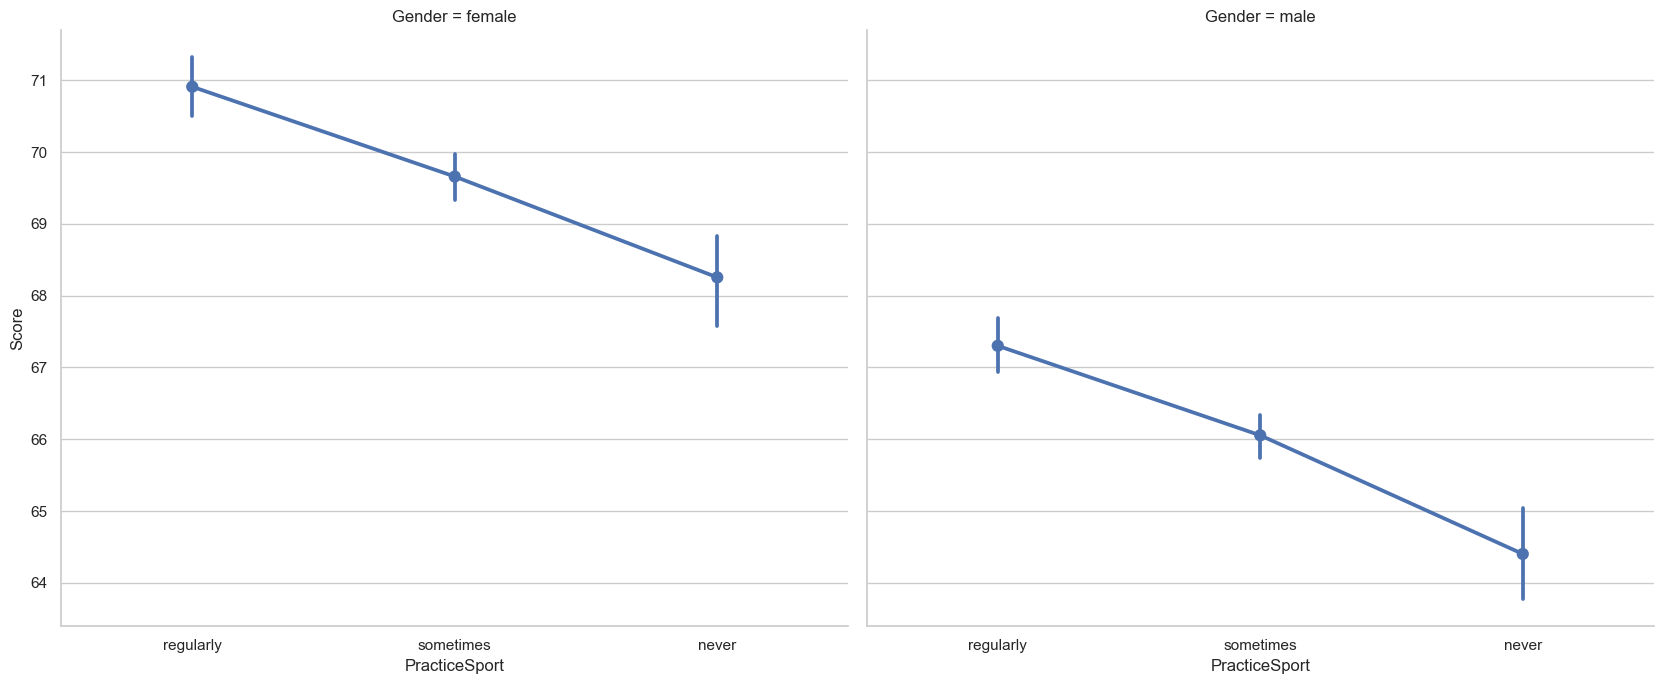

In [12]:
sns.catplot(x="PracticeSport", y="Score", data=df , kind="point", col="Gender", aspect=1.2,height=7)

Se puede ver en este grafico de puntos que los que hacen actividad fisica tienen un mejor rendimiento academico que los que no hacen actividad fisica. y dentros de los alumnos que 
hacen actividad fisica  los que lo hacen regularmente tienen un mejor rendimiento academico que los que lo hacen ocasionalmente.

In [14]:
moda=df["PracticeSport"].mode() # se calcula la media de la variable Score
print(moda) # se imprime la media de la variable Score
df["PracticeSport"]=df["PracticeSport"].fillna(moda[0]) # se reemplazan los valores nulos por la media de la variable Score

0    sometimes
Name: PracticeSport, dtype: object


In [15]:
encoder = OrdinalEncoder (categories=[["never","sometimes","regularly"]]) # se crea el objeto para codificar las variables categoricas
encoder.fit(df[["PracticeSport"]]) # se codifican las variables categoricas
df[["ActividadFisica"]]=encoder.transform(df[["PracticeSport"]]) # se codifican las variables categoricas
df=df.drop(columns=["PracticeSport"]) # se eliminan las columnas que no se van a utilizar
df.head(5) # muestreo de los primeros 5 registros para ver la estructura de los datos, para ver si se importaron correctamente

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,Score,ActividadFisica
0,female,NaN,bachelor's degree,standard,none,married,yes,3.0,school_bus,< 5,71,71,74,72.0,2.0
1,female,group C,some college,standard,NaN,married,yes,0.0,NaN,5 - 10,69,90,88,82.0,1.0
2,female,group B,master's degree,standard,none,single,yes,4.0,school_bus,< 5,87,93,91,90.0,1.0
3,male,group A,associate's degree,free/reduced,none,married,no,1.0,NaN,5 - 10,45,56,42,48.0,0.0
4,male,group C,some college,standard,none,married,yes,0.0,school_bus,5 - 10,76,78,75,76.0,1.0


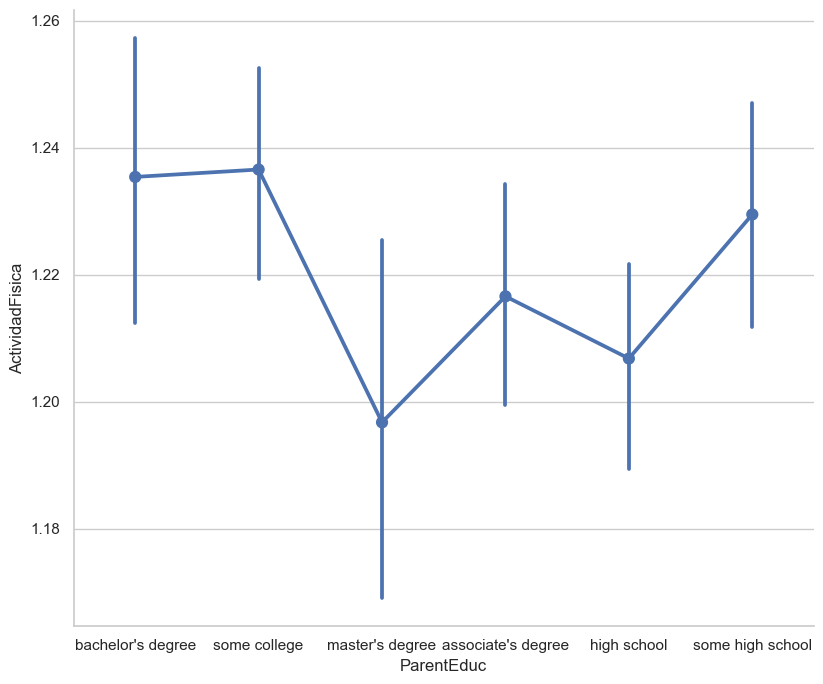

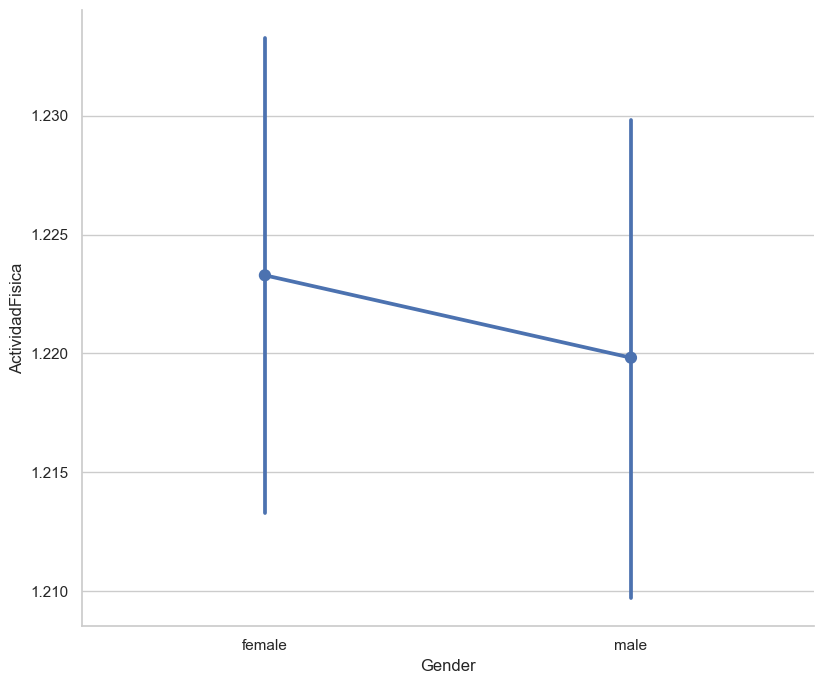

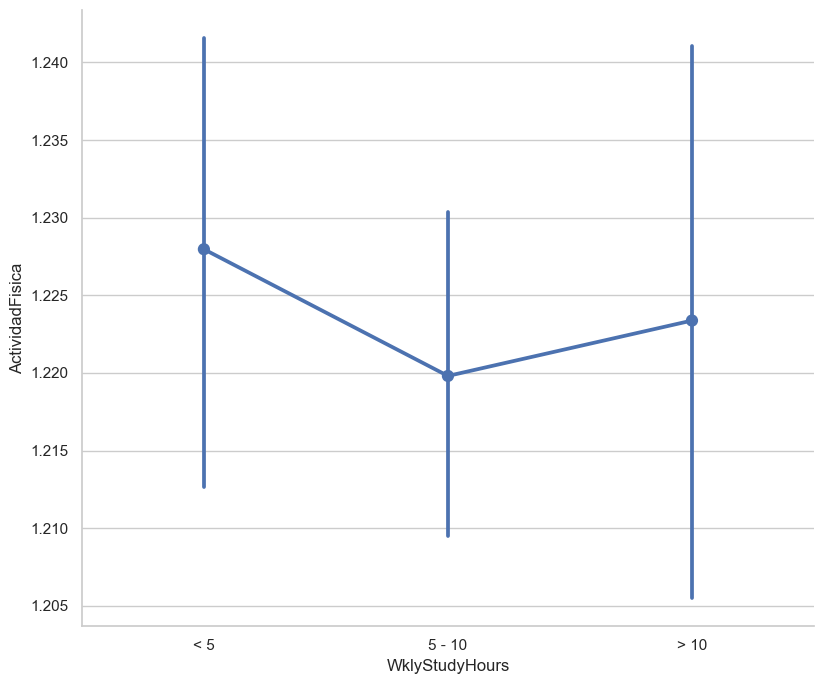

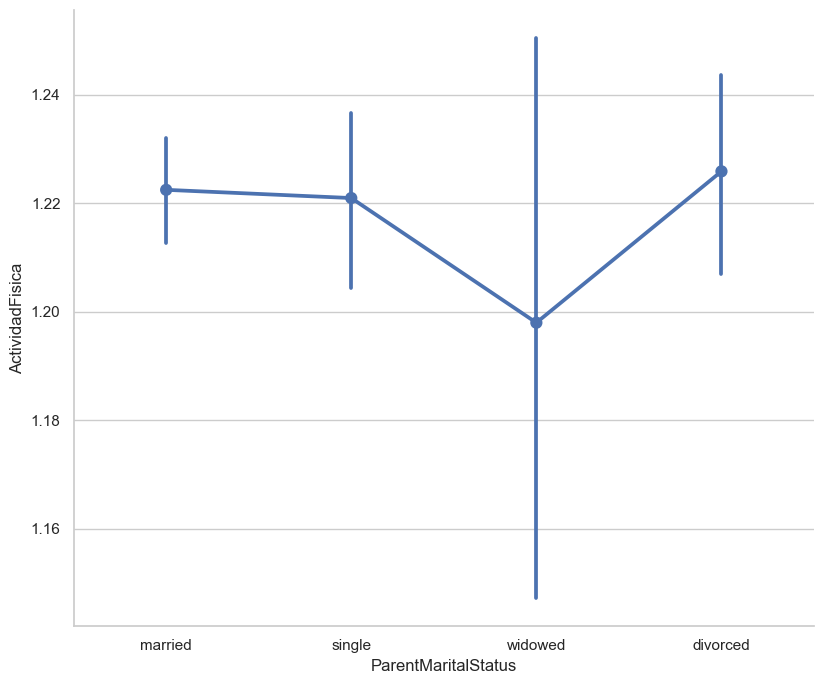

In [16]:
sns.catplot(x="ParentEduc", y="ActividadFisica", data=df , kind="point", aspect=1.2,height=7)
sns.catplot(x="Gender", y="ActividadFisica", data=df , kind="point", aspect=1.2,height=7)
sns.catplot(x="WklyStudyHours", y="ActividadFisica", data=df , kind="point", aspect=1.2,height=7)
sns.catplot(x="ParentMaritalStatus", y="ActividadFisica", data=df , kind="point", aspect=1.2,height=7)

Se Observa algunas variables de difusion como el sexo, el estado civil de los padres  y el nivel de educacion de los padres con respecto a los alumnos que hacen actividad fisica.

**Si confirma la hipotesis de la investigación se se realizará los siguientes pasos**

1) Diseño del programa: Con base en los hallazgos de la investigación, se desarrollará un programa integral que incluya actividades físicas específicas, horarios, duración y métodos de 
evaluación 
del rendimiento académico. Este programa se adaptará a las necesidades y recursos de cada escuela.
2)Implementación y capacitación: Se brindará capacitación a los docentes y personal escolar para que puedan implementar y supervisar adecuadamente el programa de actividad física. Esto 
incluirá la 
instrucción sobre las mejores prácticas, la adaptación de las actividades a diferentes edades y habilidades, así como la supervisión del progreso y los resultados.
3)Evaluación y seguimiento: Se realizarán evaluaciones periódicas para medir el impacto del programa en el rendimiento académico de los estudiantes. Esto permitirá ajustar y mejorar 
continuamente 
el programa, demostrando así su eficacia a los potenciales clientes.
4)Comercialización y difusión: Se promocionará el programa a nivel local y nacional, destacando los beneficios específicos que ofrece para mejorar el rendimiento en matemáticas, 
lectura y 
escritura. Se establecerán alianzas estratégicas con instituciones educativas y se aprovecharán las redes existentes para difundir los resultados y generar interés en el programa.

**Objetivo final**:

Establecer asociaciones a largo plazo con escuelas interesadas en mejorar el rendimiento académico de sus estudiantes a través de la actividad física, ofreciendo un programa efectivo 
respaldado por 
la investigación y demostrando resultados tangibles.

